# Lab 8: Implement Your Machine Learning Project Plan

### Import Packages


In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

## Part 1: Load the Data Set


* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`


In [3]:

WHRDataSet_filename = "data/WHR2018Chapter2OnlineData.csv"
df = pd.read_csv(WHRDataSet_filename)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze the data set with the machine learning problem and project plan in mind. 

These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed

### 2.1: First glance

In [4]:
# YOUR CODE HERE
df.shape

(1562, 19)

In [5]:
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

### 2.2: Data Cleaning

There are multiple columns in our dataset. However, not all of them will be used in our modelling. For this modelling problem, since corruption is our primary focus, factors that are usually associated more with corruption will be studied. In addition, columns will be renamed for conciseness and consistency.

In [7]:
#renaming columns
cols_to_retain = ['country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
                  'Freedom to make life choices', 'Generosity', 'Perceptions of corruption','Positive affect', 'Negative affect',
                  'Confidence in national government', 'Democratic Quality']
cols_to_rename = {'Life Ladder': 'happiness',
                'Log GDP per capita': 'log_gdp',
                'Social support': 'support',
                'Healthy life expectancy at birth': 'life',
                'Freedom to make life choices': 'freedom_of_choice',
                'Generosity': 'generosity',
                'Perceptions of corruption': 'corruption',
                'Positive affect': 'positive',
                'Negative affect': 'negative',
                'Confidence in national government': 'gov_confidence',
                'Democratic Quality': 'democracy'
               }
df_new = df[cols_to_retain].rename(cols_to_rename, axis = 1)

print("New number of columns:", df_new.shape[1])

df_new.head()

New number of columns: 13


,country,year,happiness,log_gdp,support,life,freedom_of_choice,generosity,corruption,positive,negative,gov_confidence,democracy
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996


Since we are mostly interested in the relationship between happiness and corruption, we can visualize this relationship using a regression plot.

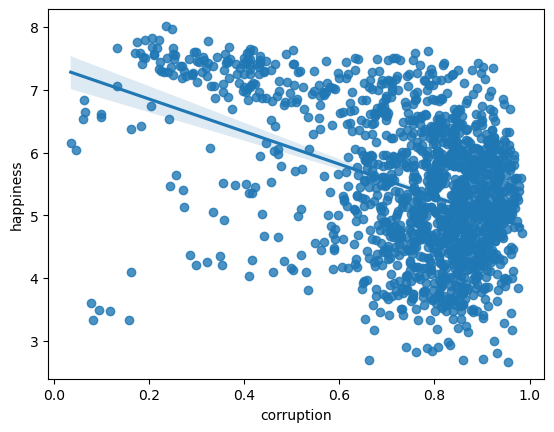

In [8]:
sns.regplot(data = df_new, x = "corruption", y = "happiness")
plt.show()

The regression plot above shows a negative relationship between happiness and corruption. This means that as corruption increases, the rate of happiness decrease. Although the corelation is not completely linear or strong, most of the points can be seen clustering on the bottom left. This relationship will be fully explored later on in a linear regression model.

In [9]:
#focus on 5 yrs: 2012 - 2017
df_new_12_17 = df_new[df_new.year.isin(range(2012, 2018))]

print("New number of rows:", df_new_12_17.shape[0])

df_new_12_17.head()

New number of rows: 850


,country,year,happiness,log_gdp,support,life,freedom_of_choice,generosity,corruption,positive,negative,gov_confidence,democracy
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693


In [10]:
df_new_12_17 = df_new_12_17.drop(columns = ["country", "year"], axis = 1)
cols = df_new_12_17.columns
print(cols, " \n")

Index(['happiness', 'log_gdp', 'support', 'life', 'freedom_of_choice',
       'generosity', 'corruption', 'positive', 'negative', 'gov_confidence',
       'democracy'],
      dtype='object')  



In [11]:
df_new_12_17.describe()

,happiness,log_gdp,support,life,freedom_of_choice,generosity,corruption,positive,negative,gov_confidence,democracy
count,850.000000,827.000000,845.000000,844.000000,835.000000,810.000000,791.000000,842.000000,845.000000,769.000000,693.000000
mean,5.419332,9.277868,0.806236,62.945495,0.744079,0.000442,0.746234,0.708221,0.276245,0.471364,-0.127157
std,1.135576,1.171685,0.118292,7.586320,0.139225,0.164825,0.184866,0.106595,0.089000,0.189287,0.897794
min,2.661718,6.473706,0.290184,42.724106,0.303540,-0.310992,0.047311,0.369440,0.095490,0.084061,-2.448228
25%,4.561647,8.404100,0.741703,57.481099,0.650489,-0.117106,0.692304,0.621559,0.209262,0.322822,-0.762823
50%,5.365687,9.481345,0.827886,64.457520,0.762252,-0.025359,0.802829,0.713798,0.267919,0.453570,-0.198793
75%,6.230812,10.207632,0.903192,68.570227,0.853464,0.095542,0.868143,0.798963,0.328529,0.605079,0.674186
max,7.788252,11.738482,0.987343,76.536362,0.985178,0.677773,0.976340,0.943621,0.704590,0.993604,1.540097


#### Winsorization 
Since some of the column values may contain outliers which may stretch some of the mean values, winsorization can be used to eliminate said outliers. In this case, outliers are values below 1% and above 99%.

In [12]:
#account for outliers using winsorization
for c in cols:
    df_new_12_17[c] = stats.mstats.winsorize(df_new_12_17[c], limits = [0.01, 0.01])
    
df_new_12_17.head()

,happiness,log_gdp,support,life,freedom_of_choice,generosity,corruption,positive,negative,gov_confidence,democracy
4,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996
5,3.572100,7.503376,0.490880,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709
6,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257
7,3.982855,7.466215,0.528597,51.693527,0.390342,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364
8,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693


The columns now contain winsorized values.

In [13]:
#describe dataset
df_new_12_17.describe()

,happiness,log_gdp,support,life,freedom_of_choice,generosity,corruption,positive,negative,gov_confidence,democracy
count,850.000000,827.000000,850.000000,850.000000,835.000000,810.000000,791.000000,850.000000,850.000000,769.000000,693.000000
mean,5.419898,9.278450,0.807912,63.040825,0.744370,0.000601,0.746848,0.710775,0.278003,0.471616,-0.125314
std,1.131418,1.170338,0.116429,7.618701,0.138420,0.164544,0.182779,0.107625,0.091212,0.188811,0.893532
min,2.904535,6.629414,0.490880,44.392307,0.390342,-0.277970,0.161791,0.464439,0.111518,0.132487,-2.081906
25%,4.561647,8.404100,0.741846,57.543217,0.650489,-0.117106,0.692304,0.622075,0.209451,0.322822,-0.762823
50%,5.365687,9.481345,0.828468,64.597580,0.762252,-0.025359,0.802829,0.714553,0.268234,0.453570,-0.198793
75%,6.230812,10.207632,0.904465,68.719608,0.853464,0.095542,0.868143,0.801732,0.329690,0.605079,0.674186
max,7.590660,11.738482,0.978965,75.812401,0.985178,0.677773,0.976340,0.943621,0.599335,0.993604,1.540097


Handling the outliers resets values of the dataset's summary statistics. For example, the maximum value of `happiness` shifts from 7.788252 to 7.590660.

#### Handling Missing Values
It is likely that the dataset contains missing values. In order to handle these, they will be replaced by the mean values of the respective columns.

In [14]:
#check for na values
print("na values present:", df_new_12_17.isnull().values.any())
print("sum of na values:", df_new_12_17.isnull().sum().sum())

na values present: True
sum of na values: 375


In [15]:
nan_count = np.sum(df_new_12_17.isnull(), axis = 0)
nan_count

happiness              0
log_gdp               23
support                0
life                   0
freedom_of_choice     15
generosity            40
corruption            59
positive               0
negative               0
gov_confidence        81
democracy            157
dtype: int64

In [16]:
null = df_new_12_17.isnull().any(axis = 1)
print(df_new_12_17[null])

      happiness   log_gdp   support       life  freedom_of_choice  generosity  \
9      2.904535  7.460144  0.490880  52.339527           0.427011   -0.106340   
19     4.639548  9.373718  0.637698  69.051659           0.749611   -0.035140   
22     5.604596  9.485086  0.839397  64.739365           0.586663   -0.198871   
23     6.354898  9.509210  0.818189  65.130157                NaN         NaN   
24     5.340854  9.541166  0.748588  65.509514                NaN         NaN   
...         ...       ...       ...        ...                ...         ...   
1528   5.175279  8.742655  0.978965  66.245766                NaN         NaN   
1537   3.825631  7.751505  0.775407  54.796665           0.532964   -0.157162   
1538   3.253560       NaN  0.789555  54.981033           0.595191         NaN   
1549   3.932777  8.211670  0.743754  53.803783           0.823169    0.129822   
1561   3.638300  7.538187  0.754147  52.674484           0.752826   -0.066005   

      corruption  positive 

In [17]:
#taking row 23 (paying attention to the generosity column) as a reference row
print("Row 23: " + str(df_new_12_17['generosity'][23]), "\n")

print("Replacing the missing values \n")
print("Printing column means \n")

#replace missing values with means
for c in cols:
    variable_name = "mean_" + str(c)
    variable_name_mean = df_new_12_17[c].mean()
    print(variable_name, ":", variable_name_mean)
    df_new_12_17[c].fillna(value = variable_name_mean, inplace = True)
    
print("\n")
print("Column means printed\n")
    
#taking row 23 (paying attention to the generosity column) as a reference row
print("Row 23: " + str(df_new_12_17['generosity'][23]), "\n")

print("Missing values replaced")

Row 23: nan 

Replacing the missing values 

Printing column means 

mean_happiness : 5.419898386001179
mean_log_gdp : 9.278449797784765
mean_support : 0.8079122010694115
mean_life : 63.040824638717666
mean_freedom_of_choice : 0.7443697547952085
mean_generosity : 0.0006005575246913666
mean_corruption : 0.7468481008584071
mean_positive : 0.7107753082411766
mean_negative : 0.27800262035764706
mean_gov_confidence : 0.47161557239922014
mean_democracy : -0.12531373836796536


Column means printed

Row 23: 0.0006005575246913666 

Missing values replaced


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

### Creating Training and Test Sets

The model will be predicting `happiness`, which will be the label

In [18]:
#label and features
y = df_new_12_17['happiness']
X = df_new_12_17.drop(columns = 'happiness', axis = 1)

Take the test set that is 20% of the dataset size and a seed value of 1234

In [19]:
#training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

### Fitting the Models

In order to determine what regression model will be best, different models will be created and their RMSE and R2 score values compared to pick the best model. These models include a Linear Regression model, Decision Tree Model, and a Random Forest Tree Model. <br>
However, before creating these models, a grid search will be performed in order to determine the best hyperparameters; i.e, the features that contribute the most to the label.

### a) Linear Regression

In [20]:
r2_score?

In [21]:
# linear regression model - create, fit, predict, rmse, r2 score
# create model
lr_model = LinearRegression()

#fit model on training data
lr_model.fit(X_train, y_train)

#make predictions on test data
y_lr_predict = lr_model.predict(X_test)

#rmse and r2 scores
lr_rmse = mean_squared_error(y_test, y_lr_predict, squared = False)
lr_r2 = r2_score(y_test, y_lr_predict)

#display scores
print("LM rmse:", lr_rmse)
print("LM r2:", lr_r2)

LM rmse: 0.47988802086837773
LM r2: 0.801184637334462


### b) Decision Tree

In order to implement this, we'll perform a grid search cross validation in order to determine hyperparameter values that yield the best model

In [22]:
# range of hyperparameter values
# max_depth
depth_hyperparams = [n*2 for n in range(1,11)]

# min_samples_leaf
leaf_hyperparams = [n*10 for n in range(1,11)]

# parameter grid
param_grid = {"max_depth": depth_hyperparams,
              "min_samples_leaf": leaf_hyperparams}
param_grid

{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [23]:
# DT Grid Search
print("Performing Grid Search")

# create model
dt_model = DecisionTreeRegressor()

# perform grid search
dt_grid = GridSearchCV(dt_model, param_grid, cv = 5)

# fit model to training data
dt_grid_search = dt_grid.fit(X_train, y_train)

print("Complete")

Performing Grid Search
Complete


In [24]:
# choosing the best hyperparameters
print("Best hyperparameter values: {0}".format(dt_grid_search.best_params_))

# getting the accuracy score from the best hyperparameter combination
print("Accuracy score: {0}".format(dt_grid_search.best_score_))

Best hyperparameter values: {'max_depth': 6, 'min_samples_leaf': 10}
Accuracy score: 0.7681188645478313


We'll now create a decision tree model with the best hyperparameter values of `max_depth = 6` and `min_samples_leaf = 10`.

In [25]:
# DT model
# create the model
dt_model = DecisionTreeRegressor(max_depth = 6, min_samples_leaf = 10)

# fit the model
dt_model.fit(X_train, y_train)

# predict
y_dt_predict = dt_model.predict(X_test)

# rmse and r2 score
dt_rmse = mean_squared_error(y_test, y_dt_predict, squared = False)
dt_r2 = r2_score(y_test, y_dt_predict)

# print scores
print("DT rmse:", dt_rmse)
print("DT r2:", dt_r2)

DT rmse: 0.4837291092956056
DT r2: 0.7979892100525792


### c) Random Forest
Same as above, we'll perform a grid search to determine the best hyperparameter values

In [26]:
# range of hyperparameters
# max_depth
rf_depth_hyperparams = [n*5 for n in range(1,11)]

# n_estimators
rf_est_hyperparams = [3**n for n in range(1,7)]

# parameter grid
rf_param_grid = {"max_depth": rf_depth_hyperparams,
                 "n_estimators": rf_est_hyperparams}
rf_param_grid

{'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
 'n_estimators': [3, 9, 27, 81, 243, 729]}

In [27]:
# RF Grid Search
print("Performing Grid Search")

# create model
rf_model = RandomForestRegressor()

# perform grid search
rf_grid = GridSearchCV(rf_model, rf_param_grid)

# fit model to training data
rf_grid_search = rf_grid.fit(X_train, y_train)

print("Grid Search Complete")

Performing Grid Search
Grid Search Complete


In [28]:
# choosing the best hyperparameter values
print("Best hyperparameter values for random forest tree: {0}".format(rf_grid_search.best_params_))

# accuracy score from the best combination of hyperparameter values
print("Accuracy score: {0}".format(rf_grid_search.best_score_))

Best hyperparameter values for random forest tree: {'max_depth': 35, 'n_estimators': 81}
Accuracy score: 0.8569403201236092


We'll create a random forest model using `max_depth = 20` and `n_estimators = 81`

In [29]:
# RF model
# create model
rf_model = RandomForestRegressor(max_depth = 20, n_estimators = 81)

# fit model
rf_model.fit(X_train, y_train)

# predict
y_rf_predict = rf_model.predict(X_test)

# rmse and r2 score
rf_rmse = mean_squared_error(y_test, y_rf_predict, squared = False)
rf_r2 = r2_score(y_test, y_rf_predict)

# print scores
print("RF rmse:", rf_rmse)
print("RF r2:", rf_r2)

RF rmse: 0.3749751701456317
RF r2: 0.8786121712438137


### d) Gradient Boost Decision Tree
We'll begin by performing a grid search to determine the best hyperparameter values

In [30]:
# hyperparameter ranges
# max_depth
gbdt_depth_hyperparams = [n for n in range(1,11)]

# n_estimators
gbdt_est_hyperparams = [2**n for n in range(1,13)]

# parameter grid
gbdt_param_grid = {"max_depth": gbdt_depth_hyperparams,
                   "n_estimators": gbdt_est_hyperparams}
gbdt_param_grid

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'n_estimators': [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]}

In [31]:
# GBDT Grid Search
print("Performing Grid Search")

# model
gbdt_model = GradientBoostingRegressor()

# grid search
gbdt_grid = GridSearchCV(gbdt_model, gbdt_param_grid)

# fit model
gbdt_grid_search = gbdt_grid.fit(X_train, y_train)

print("Grid Search Complete")

Performing Grid Search
Grid Search Complete


In [32]:
# best hyperparameter values
print("Best hyperparameter values for Gradiet Boost Decision Tree: {0}".format(gbdt_grid_search.best_params_))

# accuracy score from best combination of hyperparameter values
print("Accuracy score: {0}".format(gbdt_grid_search.best_score_))

Best hyperparameter values for Gradiet Boost Decision Tree: {'max_depth': 5, 'n_estimators': 512}
Accuracy score: 0.8540574941732955


We'll create the model using `max_depth = 5` and `n_estimators = 1024`

In [33]:
# GBDT model
# model
gbdt_model = GradientBoostingRegressor(max_depth = 5 , n_estimators = 1024)

# fit
gbdt_model.fit(X_train, y_train)

# predict
y_gbdt_predict = gbdt_model.predict(X_test)

# rmse and r2 score
gbdt_rmse = mean_squared_error(y_test, y_gbdt_predict, squared = False)
gbdt_r2 = r2_score(y_test, y_gbdt_predict)

# print scores
print("GBDT rmse:", gbdt_rmse)
print("GBDT r2:", gbdt_r2)

GBDT rmse: 0.41067569900254874
GBDT r2: 0.8543977347632934


#### Visually Comparing the Performance of the Models
We'll create a plot to compare the performace of each regressor

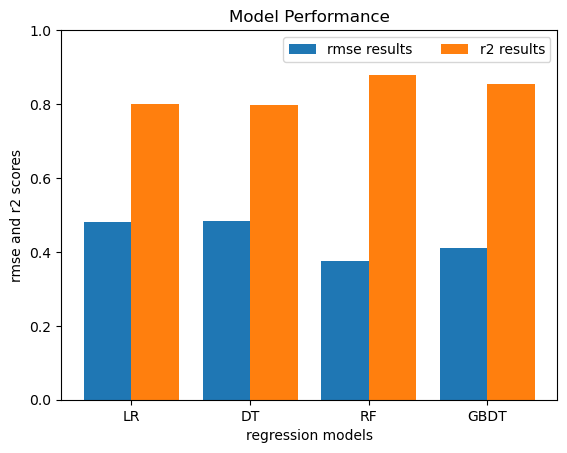

In [34]:
rmse_results = [lr_rmse, dt_rmse, rf_rmse, gbdt_rmse]
r2_results = [lr_r2, dt_r2, rf_r2, gbdt_r2]

rg = np.arange(4)
width = 0.4

# bar plot with rmse values
plt.bar(rg, rmse_results, width, label = "rmse results")

# bar plot with r2 values
plt.bar(rg+width, r2_results, width, label = "r2 results")

# labels for clarity
labs = ["LR", "DT", "RF", "GBDT"]
plt.xticks(rg+width/2, labs)

plt.ylim([0,1])
plt.xlabel("regression models")
plt.ylabel("rmse and r2 scores")
plt.title("Model Performance")

plt.legend(loc = "upper right", ncol = 2)

plt.show()

When the performances of the models are compared side by side we can see that the Random Forest yieds the best results, i.e., it has the highest r2 score and the lowest rmse value, which is generally how a good regression model should perform. A high r2 score means that the features are more precisely able to predict happiness (the response variable). A low rmse means there is reduced error in the model. <br>

Since the Random Forest Regressor has emerged as the best model, it can be used to determine how well corruption can be used to predict accuracy.

In [51]:
# label and feature
y_cor = df_new_12_17["happiness"]
X_cor = df_new_12_17["corruption"].to_frame()

# training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_cor, y_cor, test_size = 0.10, random_state = 1234)

# fit a random forest model
rf_cor_model = RandomForestRegressor(max_depth = 20, n_estimators = 81)
rf_cor_model.fit(X_train, y_train)
y_rf_cor_pred = rf_cor_model.predict(X_test)

# determine prediction error
err = abs(y_rf_cor_pred - y_test)

# display performance metrics
print("mean absolute error:", round(np.mean(err), 2))

# determine model accuracy using mean absolute percentage error (mape)
mape = np.mean(100 * (err / y_test))
print("mean absolute percentage error:", round(mape, 2), "%")
accuracy = 100 - mape
print("Accuracy:", round(accuracy, 2), '%.')

mean absolute error: 0.84
mean absolute percentage error: 15.76 %
Accuracy: 84.24 %.


There is minimial error associated with the random forest tree as shown by the mean absolute percentage error. A mean absolute percentage error of 15.76% means that the model's predictions are on average 15.76% off from the true values. Furthermore, the model can accurately predict corruption as a factor affecting happiness by about 84.24%. This further supports why the random forest is a better model to predict the relationship between happiness and corruption.


#### Conclusion

It is evident that corruption can be used as a measure of happiness within a country. A random forest regressor is the best model to support this relationship given it's relatively high accuracy score.